## Importing modules and cleaning data

In [1]:

#importing requried modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("data.csv", encoding = 'ISO-8859-1')

In [4]:
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [7]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [8]:
#missing value rows
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
#eliminating the null values
df_new=df.dropna()

In [11]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
# change columns tyoe - String to Int type 
df_new['CustomerID'] = df_new['CustomerID'].astype('int64')
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [14]:
# Rename the dataframe to make code more readable
df2 = df_new.copy()

In [15]:
df2.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


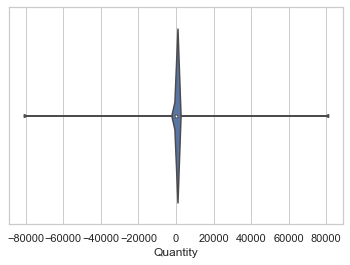

In [16]:
#visualizing negative value in quantity column
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

In [17]:
#selecting values greater than 0 to eliminate negative values as it is irrelevent
df2 = df2[df2.Quantity > 0]
df2.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


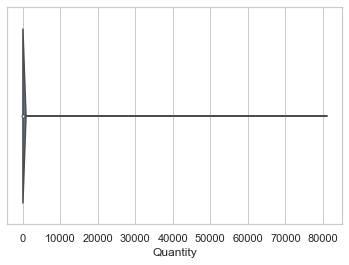

In [18]:
ax = sns.violinplot(x=df2["Quantity"])

In [19]:
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
# Let's add Month, Day and Hour Colummns that we'll use for further analysis
# Starting with Month_Year First
df2['year_month'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [21]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [22]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   year_month   397924 non-null  period[M]     
 10  year         397924 non-null  int64         
 11  month        397924 non-null  int64         
 12  day          397924 non-null  int64         
 13  dayofweek    397924 non-null  int64         
 14  dayofyear    397924 non-null  int64         
 15  weekofyear   397924 non-null  int6

In [24]:
#to convert mondat to 1 and sunday to 7 so that we can eliminate 0
df2['dayofweek']=df2['dayofweek']+1
df2.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   year_month   397924 non-null  period[M]     
 10  year         397924 non-null  int64         
 11  month        397924 non-null  int64         
 12  day          397924 non-null  int64         
 13  dayofweek    397924 non-null  int64         
 14  dayofyear    397924 non-null  int64         
 15  weekofyear   397924 non-null  int6

In [26]:
#no of sales for each country
sales_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.rename(columns={"InvoiceNo":"NumberOfSales"},inplace=True)
sales_per_cust.head(15)

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


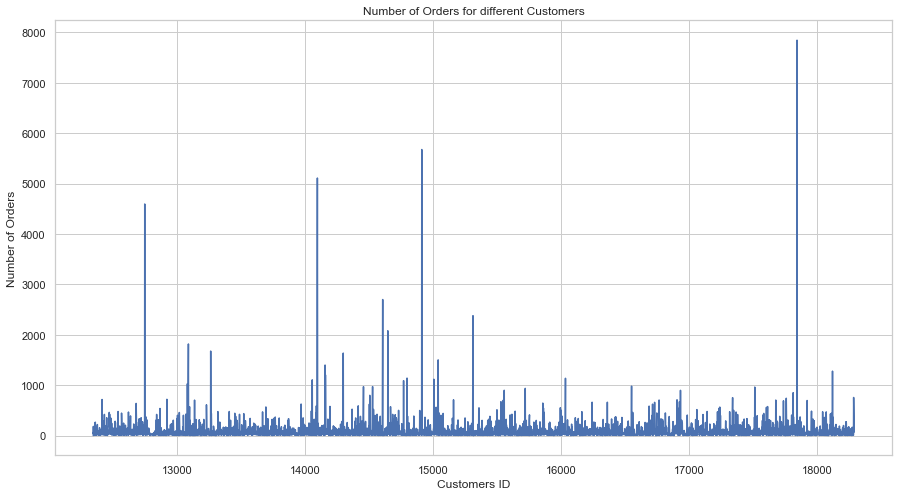

In [27]:
#vishulization no.of sales for all the customers
orders=df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,8))
plt.plot(orders.CustomerID,orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [28]:
# Consolidating the number of Sales Made per customer (Revenue)
# we use use index=False, to indicate to the groupby that we don't want to set the column ID as index
spent_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_cust.columns = ['CustomerID', 'Country', "TotalSpent"]
spent_per_cust.head(10)

,CustomerID,Country,TotalSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


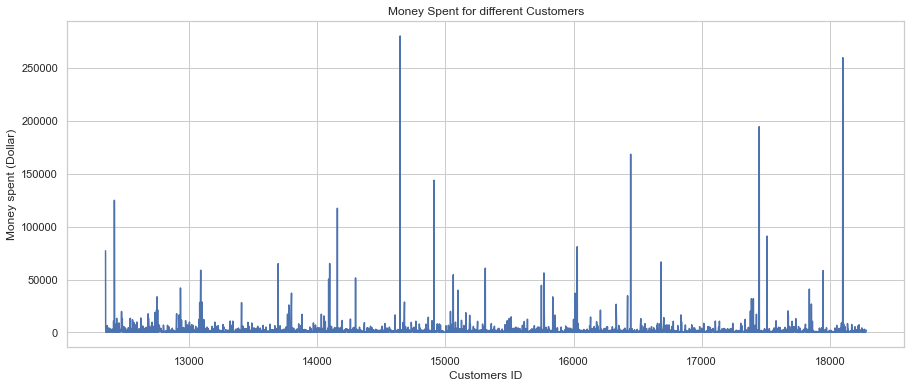

In [29]:
# Visualizing Money Spent for all Customer
money_spent = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# Purchasing Patterns

In [30]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [31]:
#insert a new column.3rd column with year_month joining year with month from InvoiceDate 
df2.insert(loc=2, column='year_month_comb', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month)) #201000+12(day)=201012
# Insert a new column as 6th column (index 5) with Hour extracted from InvoiceDate
df2.insert(loc=6,column='hour',value=df2.InvoiceDate.dt.hour)

In [32]:
# Check to see if our year_month and hour columns were made
df2.head()

,InvoiceNo,StockCode,year_month_comb,Description,Quantity,InvoiceDate,hour,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,8,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,2010-12-01 08:26:00,8,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,8,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,8,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,8,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [33]:
!pip install pandas_profiling

In [34]:
import pandas_profiling

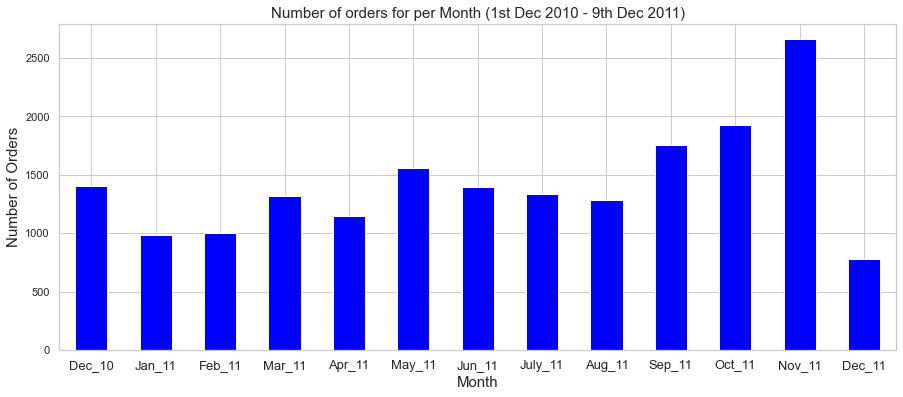

In [35]:
# Create a plot that shows the number of orders per month 
ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color='blue',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [36]:
# Let's see number of orders per day of the week
df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: dayofweek, dtype: int64

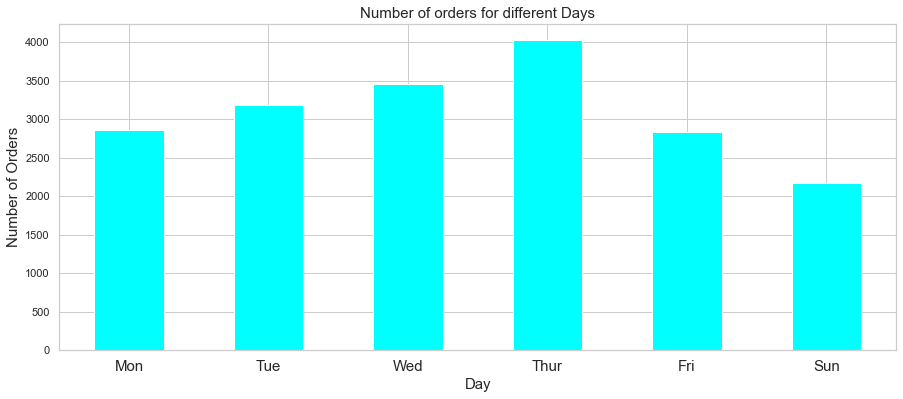

In [37]:
# Create a plot for the above
ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar',color='cyan',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

ValueError: The number of FixedLocator locations (50), usually from a call to set_ticks, does not match the number of ticklabels (52).

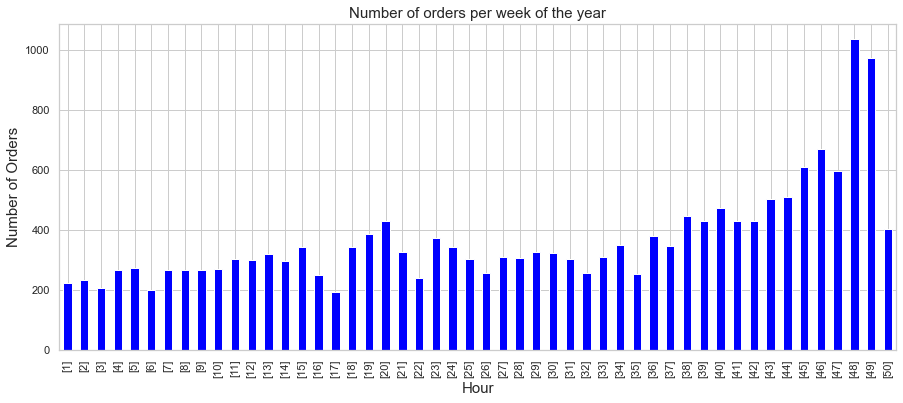

In [38]:
# Number of sales per week of the year
ax = df2.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color='blue',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per week of the year',fontsize=15)
ax.set_xticklabels(range(0,52), rotation='horizontal', fontsize=15)
plt.show()

In [39]:
df2.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

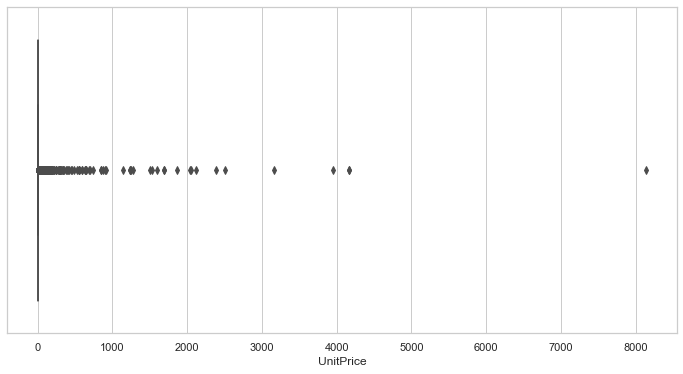

In [40]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df2.UnitPrice)
plt.show()

In [41]:
# What are the free items
df_free = df2[df2.UnitPrice == 0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,year_month_comb,Description,Quantity,InvoiceDate,hour,UnitPrice,CustomerID,Country,AmountSpent,year_month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,14,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,14,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,13,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,16,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,16,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1


In [42]:
# See when these free items were given out
df_free.year_month.value_counts().sort_index()

2010-12     3
2011-01     3
2011-02     1
2011-03     2
2011-04     2
2011-05     2
2011-07     2
2011-08     6
2011-09     2
2011-10     3
2011-11    14
Freq: M, Name: year_month, dtype: int64

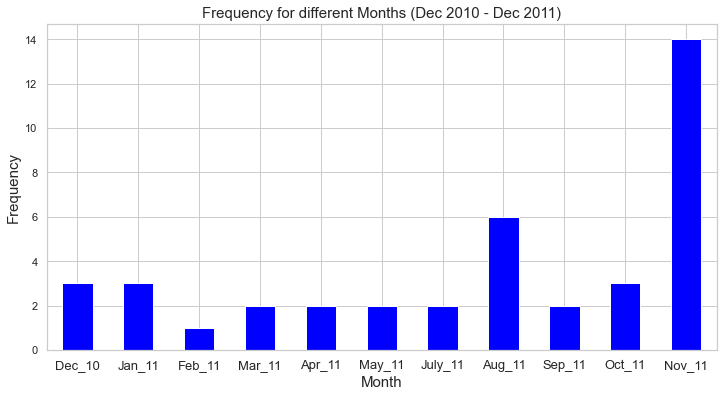

In [43]:
# Ploting the above data
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color='blue')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

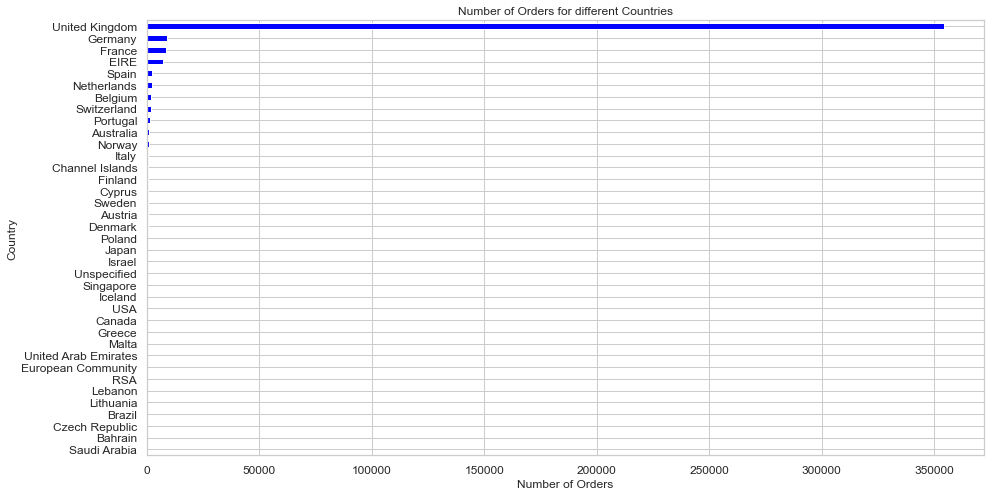

In [44]:
group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

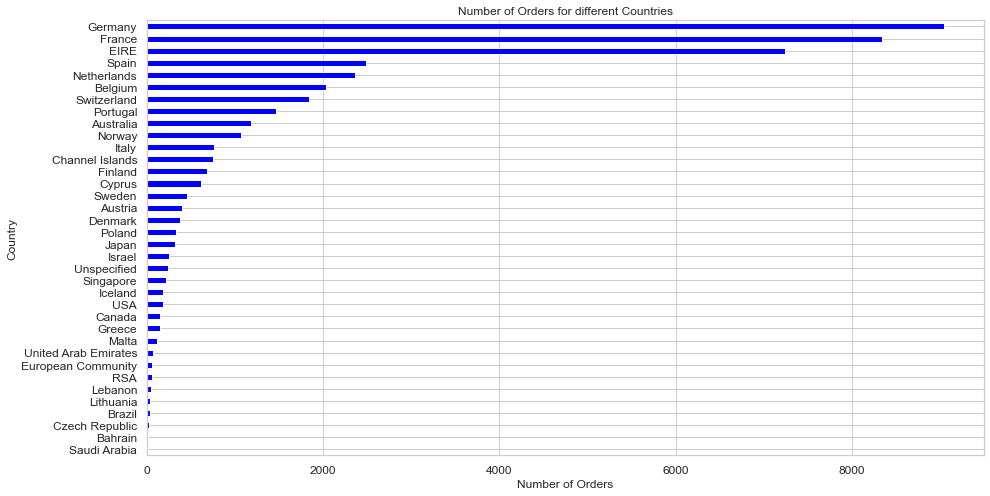

In [45]:
# Excluding UK now

group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot(kind='barh', fontsize=12, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

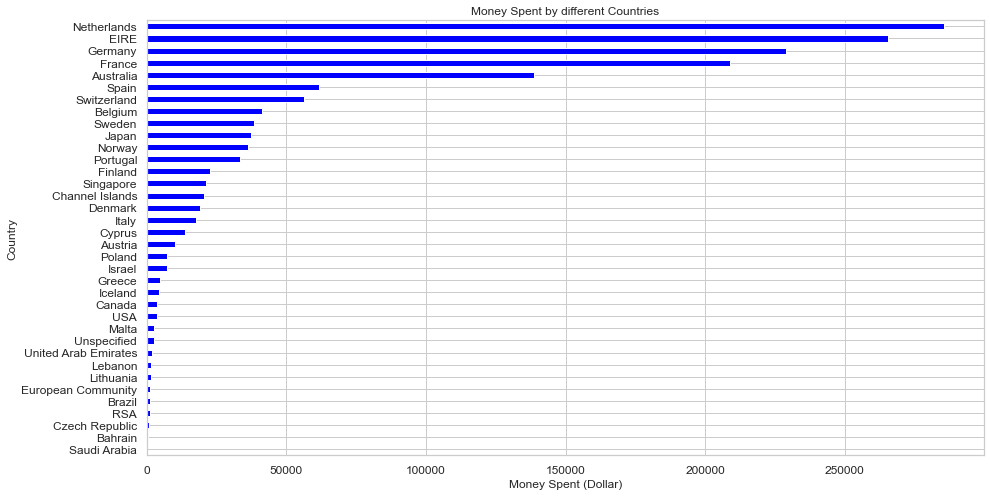

In [46]:
# Amount spent by each country (without UK)
group_country_amount_spent = df2.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color='blue')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()